In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
import bfunc

In [3]:
reg = 'M8'
line = 'M8'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

7.526433868794324

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
box_size = np.sqrt((data.X.max()-data.X.min())*(data.Y.max()-data.Y.min()))*VF['pc']*3600

In [8]:
table = sosflog(data,0.05,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      120.0     7.615395   2.675158     0.791245     5.354829     7.782038   
1       26.0    11.899253   0.433647    11.239235    11.529089    11.929682   
2       40.0    13.271139   0.381883    12.654309    12.983676    13.227970   
3       65.0    15.106282   0.504796    14.194495    14.650601    15.235433   
4       64.0    16.861060   0.481953    15.893827    16.470948    16.879467   
5       65.0    18.767554   0.613936    17.831891    18.263306    18.703968   
6       94.0    21.133926   0.713545    19.974009    20.559569    21.049359   
7      149.0    23.757493   0.748418    22.391707    23.144476    23.896595   
8      145.0    26.602527   0.931322    25.145463    25.717873    26.633610   
9      217.0    29.931188   1.000775    28.198337    29.168436    30.103572   
10     265.0    33.488999   1.202438    31.623099    32.357067    33.359435   
11     327.0    37.605463   1.302154    35.490129    36.400365    37.729424   
12     476.0    42.308651   1.379651    39.843353    41.101329    42.360789   
13     507.0    47.461096   1.528135    44.670129    46.153629    47.423435   
14     656.0    53.319516   1.775524    50.119745    51.869602    53.401198   
15     830.0    59.706159   2.012052    56.247980    57.999251    59.703365   
16    1043.0    66.996783   2.188011    63.128150    65.058788    66.962711   
17    1360.0    75.279347   2.507515    70.798404    73.129470    75.338339   
18    1611.0    84.411037   2.854021    79.438952    81.984087    84.427727   
19    2055.0    94.580431   3.196894    89.127334    91.646989    94.489685   
20    2576.0   106.150995   3.529743   100.000364   103.011505   106.200249   
21    3175.0   119.196577   3.901931   112.210819   115.876297   119.287084   
22    3896.0   133.693177   4.375735   125.893335   130.052294   133.712254   
23    4775.0   149.866790   4.947159   141.256644   145.615723   149.881232   
24    5914.0   168.182126   5.609277   158.493231   163.322388   168.150821   
25    7153.0   188.839478   6.263874   177.828089   183.481333   188.826407   
26    8932.0   211.936180   6.985483   199.529508   205.874134   212.077523   
27   11007.0   237.596724   7.906390   223.875011   230.868115   237.579306   
28   13361.0   266.831628   8.869478   251.190298   259.263004   266.845299   
29   16180.0   299.146766   9.976286   281.841978   290.607938   299.250487   
30   19948.0   335.816824  11.066577   316.228045   326.190524   336.164312   
31   23504.0   376.682806  12.488323   354.813395   365.796516   376.673758   
32   28528.0   422.617920  14.012106   398.107397   410.398552   422.865353   
33   33027.0   474.074523  15.621327   446.686592   460.723111   474.293627   
34   38273.0   532.089988  17.627848   501.187427   516.837581   532.230557   
35   43771.0   596.743624  19.744860   562.342072   579.662505   596.748136   
36   49940.0   669.397718  22.230039   630.958333   650.090164   669.285731   
37   53760.0   750.701785  24.929292   707.946198   729.175201   750.222646   
38   55167.0   841.759662  27.973909   794.328850   817.308506   841.429951   
39   54490.0   944.243805  31.421277   891.252505   916.733805   943.683459   
40   50206.0  1058.719081  35.174751  1000.002065  1027.977250  1057.399950   
41   43882.0  1187.167550  39.571850  1122.020841  1152.484405  1185.591813   
42   36573.0  1331.237644  44.158638  1258.931196  1292.551776  1329.370318   
43   27683.0  1492.773547  49.707161  1412.543414  1449.235863  1490.138735   
44   19237.0  1674.100274  55.750832  1584.899151  1625.250831  1670.172001   
45   12610.0  1876.276655  62.325909  1778.279491  1821.832011  1870.880098   
46    7352.0  2103.268527  69.485850  1995.289009  2042.491398  2095.409421   
47    3723.0  2353.588977  76.335297  2238.784477  2288.51555

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

1.052711441487156

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.3544735567030707

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

5.859920534494883

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
rgrid = np.linspace(s[0], s[:-1])

(7.526433868794324, 1.052711441487156, 1.0, 0.00545415391248228, 0.01)

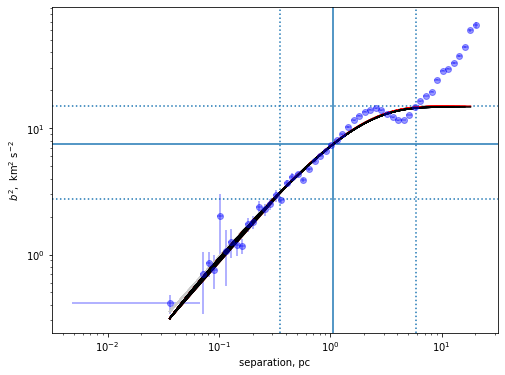

In [16]:
m = 1.0
s0 = VF['s0']
noise = 0.01

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="black")


ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m, s0, noise

In [17]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      120.0     7.615395   2.675158     0.791245     5.354829     7.782038   
1       26.0    11.899253   0.433647    11.239235    11.529089    11.929682   
2       40.0    13.271139   0.381883    12.654309    12.983676    13.227970   
3       65.0    15.106282   0.504796    14.194495    14.650601    15.235433   
4       64.0    16.861060   0.481953    15.893827    16.470948    16.879467   
5       65.0    18.767554   0.613936    17.831891    18.263306    18.703968   
6       94.0    21.133926   0.713545    19.974009    20.559569    21.049359   
7      149.0    23.757493   0.748418    22.391707    23.144476    23.896595   
8      145.0    26.602527   0.931322    25.145463    25.717873    26.633610   
9      217.0    29.931188   1.000775    28.198337    29.168436    30.103572   
10     265.0    33.488999   1.202438    31.623099    32.357067    33.359435   
11     327.0    37.605463   1.302154    35.490129    36.400365    37.729424   
12     476.0    42.308651   1.379651    39.843353    41.101329    42.360789   
13     507.0    47.461096   1.528135    44.670129    46.153629    47.423435   
14     656.0    53.319516   1.775524    50.119745    51.869602    53.401198   
15     830.0    59.706159   2.012052    56.247980    57.999251    59.703365   
16    1043.0    66.996783   2.188011    63.128150    65.058788    66.962711   
17    1360.0    75.279347   2.507515    70.798404    73.129470    75.338339   
18    1611.0    84.411037   2.854021    79.438952    81.984087    84.427727   
19    2055.0    94.580431   3.196894    89.127334    91.646989    94.489685   
20    2576.0   106.150995   3.529743   100.000364   103.011505   106.200249   
21    3175.0   119.196577   3.901931   112.210819   115.876297   119.287084   
22    3896.0   133.693177   4.375735   125.893335   130.052294   133.712254   
23    4775.0   149.866790   4.947159   141.256644   145.615723   149.881232   
24    5914.0   168.182126   5.609277   158.493231   163.322388   168.150821   
25    7153.0   188.839478   6.263874   177.828089   183.481333   188.826407   
26    8932.0   211.936180   6.985483   199.529508   205.874134   212.077523   
27   11007.0   237.596724   7.906390   223.875011   230.868115   237.579306   
28   13361.0   266.831628   8.869478   251.190298   259.263004   266.845299   
29   16180.0   299.146766   9.976286   281.841978   290.607938   299.250487   
30   19948.0   335.816824  11.066577   316.228045   326.190524   336.164312   
31   23504.0   376.682806  12.488323   354.813395   365.796516   376.673758   
32   28528.0   422.617920  14.012106   398.107397   410.398552   422.865353   
33   33027.0   474.074523  15.621327   446.686592   460.723111   474.293627   
34   38273.0   532.089988  17.627848   501.187427   516.837581   532.230557   
35   43771.0   596.743624  19.744860   562.342072   579.662505   596.748136   
36   49940.0   669.397718  22.230039   630.958333   650.090164   669.285731   
37   53760.0   750.701785  24.929292   707.946198   729.175201   750.222646   
38   55167.0   841.759662  27.973909   794.328850   817.308506   841.429951   
39   54490.0   944.243805  31.421277   891.252505   916.733805   943.683459   
40   50206.0  1058.719081  35.174751  1000.002065  1027.977250  1057.399950   
41   43882.0  1187.167550  39.571850  1122.020841  1152.484405  1185.591813   
42   36573.0  1331.237644  44.158638  1258.931196  1292.551776  1329.370318   
43   27683.0  1492.773547  49.707161  1412.543414  1449.235863  1490.138735   
44   19237.0  1674.100274  55.750832  1584.899151  1625.250831  1670.172001   
45   12610.0  1876.276655  62.325909  1778.279491  1821.832011  1870.880098   
46    7352.0  2103.268527  69.485850  1995.289009  2042.491398  2095.409421   
47    3723.0  2353.588977  76.335297  2238.784477  2288.51555

In [22]:
M8 = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m,
        'box_size': box_size}

In [23]:
f = open('Results\\SF'+ line + '.pkl',"wb")
pickle.dump(M8,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.81352972984314 seconds ---
